<h2><a href="https://leetcode.com/problems/set-matrix-zeroes">73. Set Matrix Zeroes</a></h2><h3>Medium</h3><hr><p>Given an <code>m x n</code> integer matrix <code>matrix</code>, if an element is <code>0</code>, set its entire row and column to <code>0</code>&#39;s.</p>

<p>You must do it <a href="https://en.wikipedia.org/wiki/In-place_algorithm" target="_blank">in place</a>.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2020/08/17/mat1.jpg" style="width: 450px; height: 169px;" />
<pre>
<strong>Input:</strong> matrix = [[1,1,1],[1,0,1],[1,1,1]]
<strong>Output:</strong> [[1,0,1],[0,0,0],[1,0,1]]
</pre>

<p><strong class="example">Example 2:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2020/08/17/mat2.jpg" style="width: 450px; height: 137px;" />
<pre>
<strong>Input:</strong> matrix = [[0,1,2,0],[3,4,5,2],[1,3,1,5]]
<strong>Output:</strong> [[0,0,0,0],[0,4,5,0],[0,3,1,0]]
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>m == matrix.length</code></li>
	<li><code>n == matrix[0].length</code></li>
	<li><code>1 &lt;= m, n &lt;= 200</code></li>
	<li><code>-2<sup>31</sup> &lt;= matrix[i][j] &lt;= 2<sup>31</sup> - 1</code></li>
</ul>

<p>&nbsp;</p>
<p><strong>Follow up:</strong></p>

<ul>
	<li>A straightforward solution using <code>O(mn)</code> space is probably a bad idea.</li>
	<li>A simple improvement uses <code>O(m + n)</code> space, but still not the best solution.</li>
	<li>Could you devise a constant space solution?</li>
</ul>


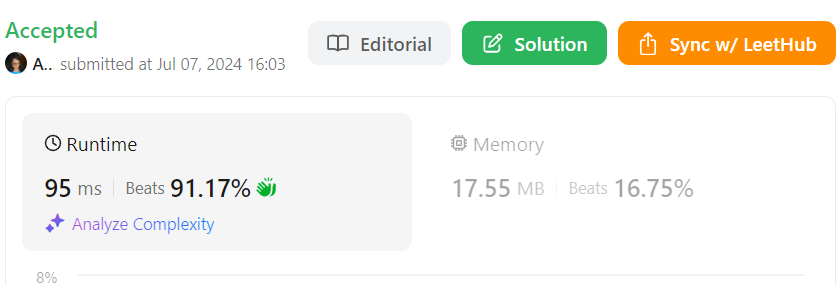


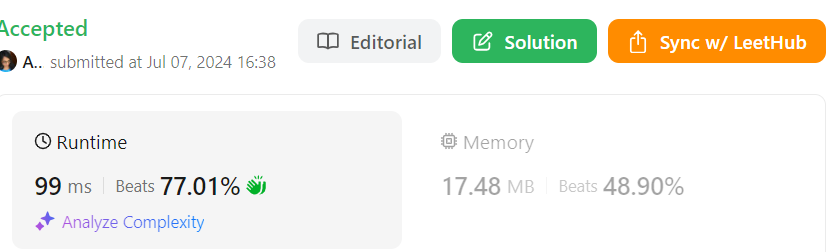

In [1]:
from collections import deque
from typing import List

class Solution:
    
    def setZeroes(self, matrix: List[List[int]]) -> None:
        """
        Do not return anything, modify matrix in-place instead.
        """
        rows = len(matrix)
        cols = len(matrix[0])
        queue = deque()
        for i in range(rows):
            for j in range(cols):
                if matrix[i][j] == 0:
                    queue.append((i,j))

        while queue:
            i, j = queue.popleft()
            matrix = self.set_zeroes(matrix, i, j, fixed_i=True)
            matrix = self.set_zeroes(matrix, i, j, fixed_i=False)

        return matrix


    def set_zeroes(self, matrix, i, j, fixed_i):
        rows, cols = len(matrix), len(matrix[0])
        if fixed_i:
            for j in range(cols):
                matrix[i][j] = 0
        else:
            for i in range(rows):
                matrix[i][j] = 0
        return matrix

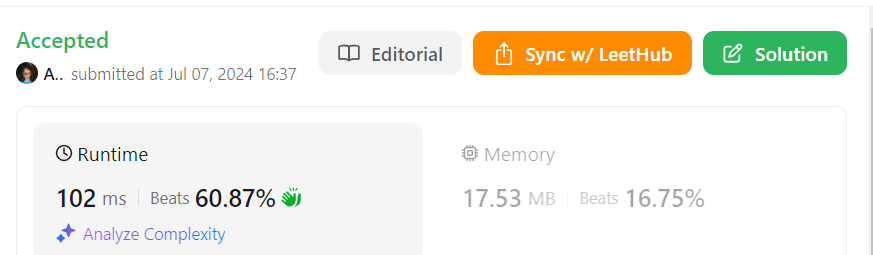

In [2]:
from typing import List
class Solution: 
    def setZeroes(self, matrix: List[List[int]]) -> None:
        """
        Do not return anything, modify matrix in-place instead.
        """
        rows = len(matrix)
        cols = len(matrix[0])

        col0 = 1
        for i in range(rows):
            for j in range(cols):
                if matrix[i][j] == 0:
                    matrix[i][0] = 0

                    if j != 0:
                        matrix[0][j] = 0
                    else:
                        col0 = 0

        for i in range(1, rows):
            for j in range(1, cols):
                if matrix[i][j] != 0:
                    if matrix[i][0] == 0 or matrix[0][j] == 0:
                        matrix[i][j] = 0

        # 0th row is 0
        if matrix[0][0] == 0:
            for j in range(cols):
                matrix[0][j] = 0
        if col0 == 0:
            for i in range(rows):
                matrix[i][0] = 0

        return matrix